### Bibliothèques pour Analyse de Données et Modélisation Deep Learning

Cet ensemble intègre des outils d'analyse, visualisation de données, et construction de modèles de deep learning efficaces.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from PIL import Image


# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

## Traitement d'image

Nous utiliserons la bibliothèque Pillow et la bibliothèque OpenCV, qui sont des bibliothèques dédiées au traitement d'images. OpenCV inclut également des modules permettant d'appliquer l'intelligence artificielle sur les images.

In [28]:
# Définir la taille des images à 48x48 pixels
picture_size = 48  
folder_path = "../input/face-expression-recognition-dataset/images/"  
expression_happy = "../input/face-expression-recognition-dataset/images/train/happy/10000.jpg"  



### Chargement et Analyse de l'Image
Ce code charge une image, la convertit en tableau numpy pour analyser ses dimensions et affiche ses valeurs pixel par pixel.

In [30]:
# On charge l'image et on la transforme en tableau contenant les valaurs des pixels
image_entrée_1 = Image.open(expression_happy)
image_simple = np.asarray(image_entrée_1)

# On vérifie d'abord la forme du tableau pour comprendre ses dimensions
print(image_simple.shape)

# Si l'image est en niveaux de gris, elle n'aura que deux dimensions
if len(image_simple.shape) == 2:
    # Dans ce cas, on peut accéder directement aux valeurs sans spécifier un canal de couleur
    print(image_simple)
else:
    # Si l'image est en couleur, on peut accéder à un canal spécifique, par exemple le canal rouge
    print(image_simple[:,:,0])



(48, 48)
[[134 127 134 ... 175 175 175]
 [132 130 133 ... 176 176 176]
 [133 128 137 ... 177 177 177]
 ...
 [138 159 172 ...  38  35  39]
 [139 160 172 ...  40  35  37]
 [139 160 172 ...  34  36  32]]


## affiche l'image

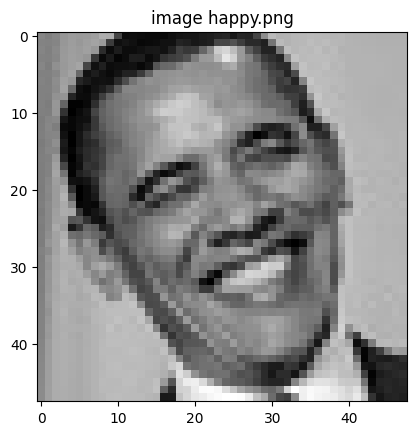

In [32]:
plt.imshow(image_simple,cmap='gray')
plt.title('image happy.png')
plt.show()

##### Image en couleur et faire des traitements dessus

taille de l'image
(48, 48)


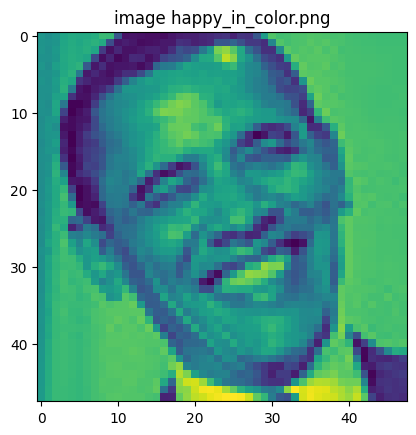

In [39]:
# On charge l'image et on la transforme en tableau contenant les couleurs
image_couleur = np.asarray(image_simple)

print("taille de l'image")
print(image_couleur.shape)

plt.imshow(image_couleur)
plt.title('image happy_in_color.png')
plt.show()

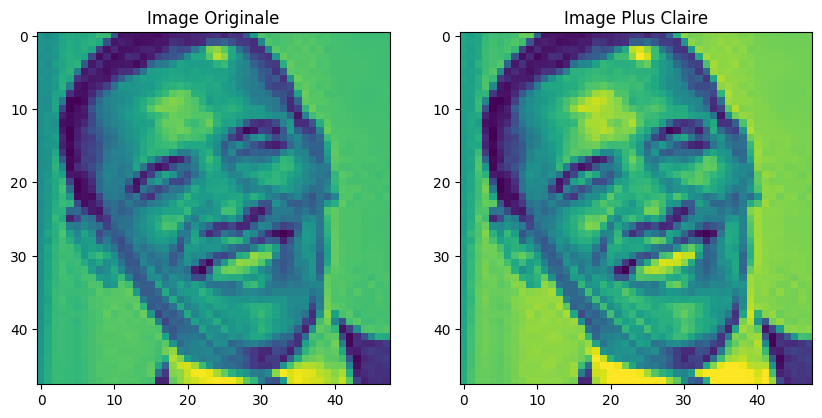

In [47]:
import matplotlib.pyplot as plt
import numpy as np


# Augmenter la luminosité de l'image
def augmenter_luminosite(image, valeur=30):
    # Convertir l'image en float pour éviter le débordement de type uint8
    image_claire = image.astype(np.float64)
    # Ajouter la valeur de luminosité, avec un maximum de 255
    image_claire += valeur
    np.clip(image_claire, 0, 255, out=image_claire)
    # Convertir en retour en uint8
    return image_claire.astype(np.uint8)

# Appliquer la fonction pour augmenter la luminosité
image_claire = augmenter_luminosite(image_couleur)

# Afficher l'image originale et l'image éclaircie
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(image_couleur)
plt.title('Image Originale')

plt.subplot(1, 2, 2)
plt.imshow(image_claire)
plt.title('Image Plus Claire')

plt.show()


In [37]:
plt.imshow(image_couleur[:,:,0], cmap='Reds')
plt.title('Couche de rouge')
plt.show()

array([[134, 127, 134, ..., 175, 175, 175],
       [132, 130, 133, ..., 176, 176, 176],
       [133, 128, 137, ..., 177, 177, 177],
       ...,
       [138, 159, 172, ...,  38,  35,  39],
       [139, 160, 172, ...,  40,  35,  37],
       [139, 160, 172, ...,  34,  36,  32]], dtype=uint8)

#### Rogner une image

In [49]:
image_crop = image_couleur[10:40,10:40]
print(image_crop.shape)

(30, 30)


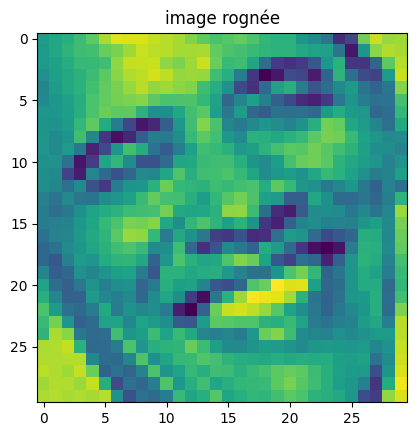

In [50]:
plt.imshow(image_crop)
plt.title('image rognée')
plt.show()

#### Inverser les couleurs : récuperer l'image en négatif

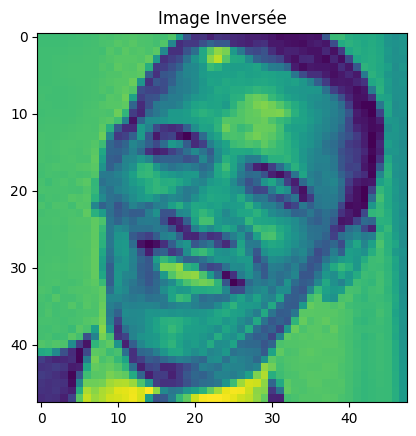

In [52]:
import numpy as np

# On fait une copie de l'image pour éviter de modifier l'originale
image_flip = np.copy(image_couleur)

# On vérifie si l'image est en niveaux de gris ou en couleur
if len(image_couleur.shape) == 2:
    # Image en niveaux de gris
    nb_lignes, nb_colonnes = image_couleur.shape
    # On inverse l'image
    for ligne in range(nb_lignes):
        for col in range(nb_colonnes):
            image_flip[ligne, col] = image_couleur[ligne, nb_colonnes-1-col]
else:
    # Image en couleur
    nb_lignes, nb_colonnes, _ = image_couleur.shape
    # On inverse l'image
    for ligne in range(nb_lignes):
        for col in range(nb_colonnes):
            for i in range(3):  # On parcourt les 3 canaux de couleur
                image_flip[ligne, col, i] = image_couleur[ligne, nb_colonnes-1-col, i]

# Si vous souhaitez afficher l'image inversée
plt.imshow(image_flip)
plt.title('Image Inversée')
plt.show()


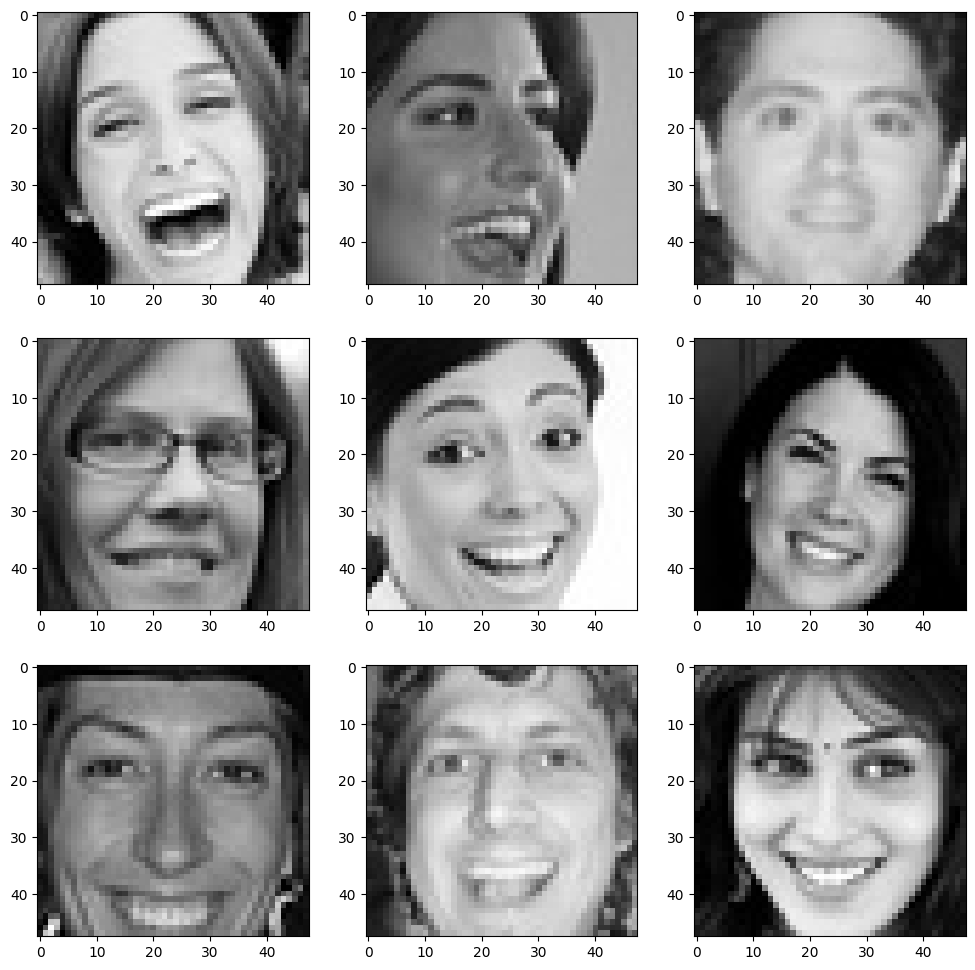

In [57]:
expression = 'happy'
plt.style.available
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

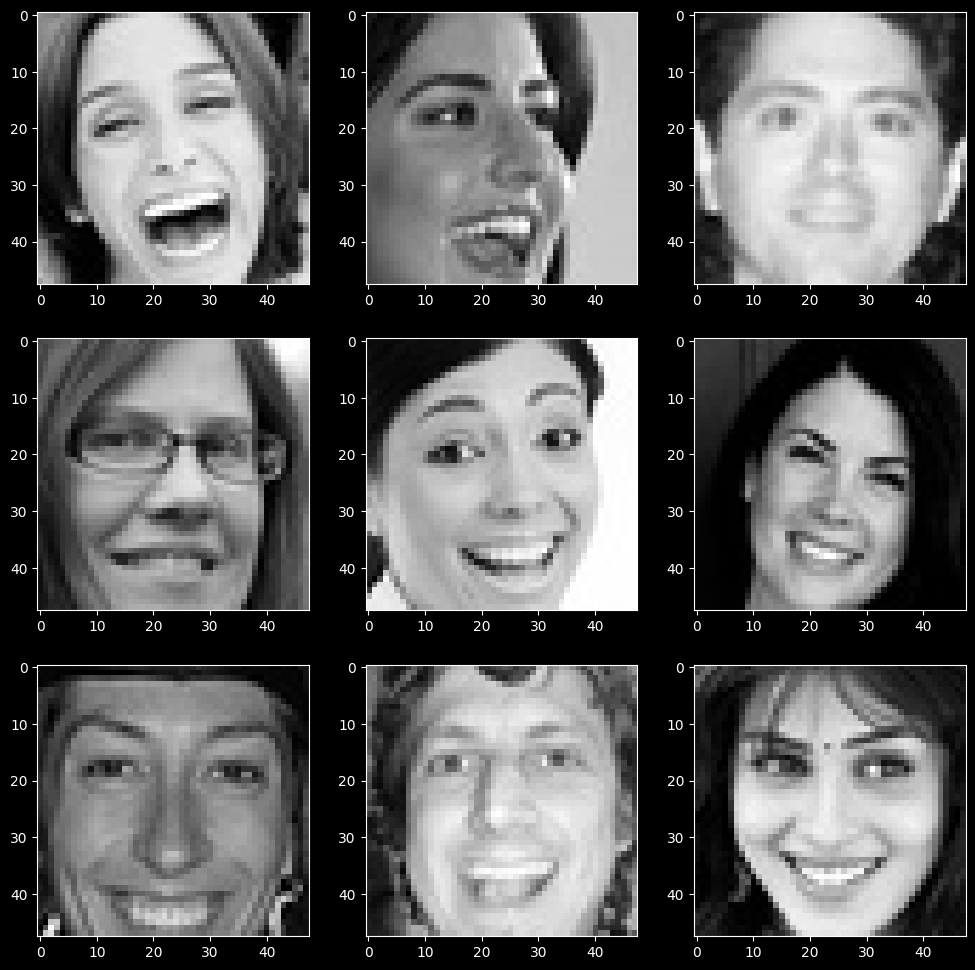

In [63]:
# Create a subplot for displaying images
plt.style.use('dark_background')
plt.figure(figsize=(12, 12))

# Loop through the first 9 images in the "happy" class
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    
    # Load the image using Pillow (PIL)
    img = Image.open(os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i]))
    
    # Resize the image to the desired size
    img = img.resize((picture_size, picture_size))
    
    # Convert PIL image to NumPy array
    img_array = np.array(img)
    
    # Convert the image to grayscale using Pillow
    img_gray = img.convert('L')
    
    # Convert the grayscale image to NumPy array
    img_gray_array = np.array(img_gray)
    
    # Display the processed image
    plt.imshow(img_gray_array, cmap='gray')
    
plt.show()


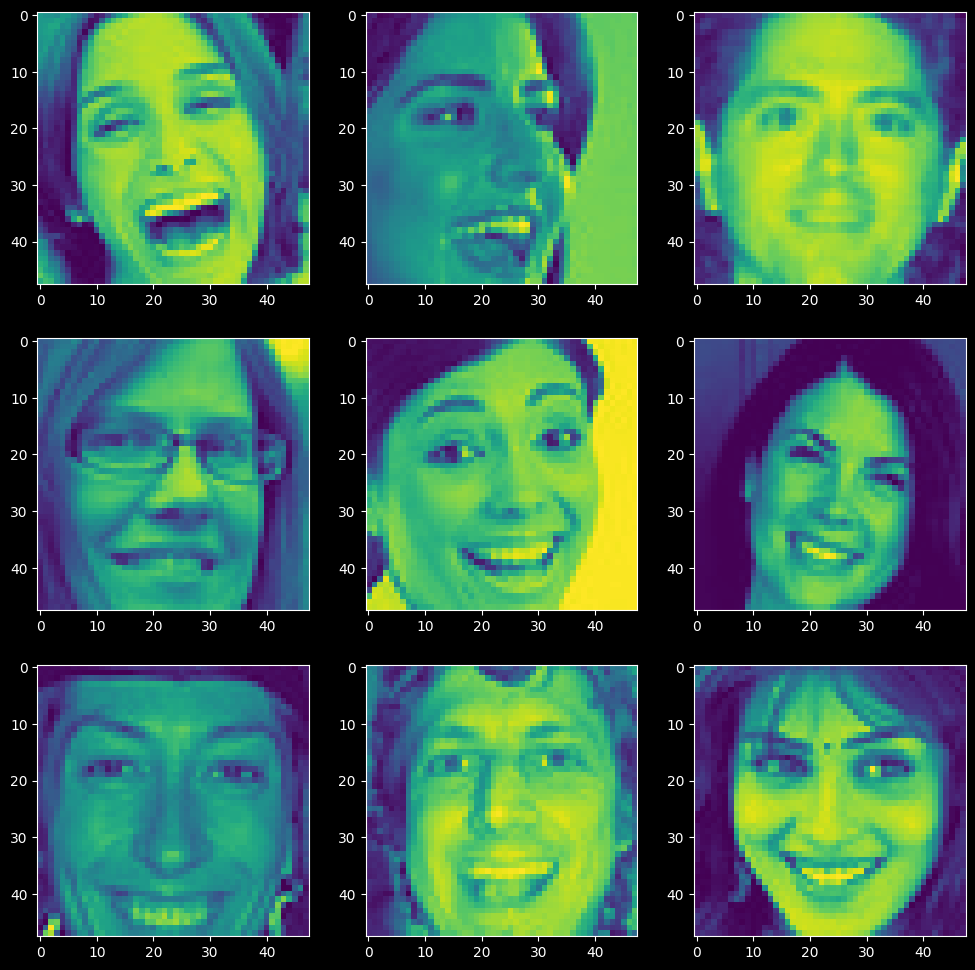

In [64]:
# Create a subplot for displaying images
plt.style.use('dark_background')
plt.figure(figsize=(12, 12))

# Loop through the first 9 images in the "happy" class
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    
    # Load the image using Pillow (PIL)
    img = Image.open(os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i]))
    
    # Resize the image to the desired size
    img = img.resize((picture_size, picture_size))
    
    # Convert PIL image to NumPy array
    img_array = np.array(img)
    
    # Display the original color image
    plt.imshow(img_array)
    
plt.show()


In [65]:
# Splitting into Train and Test Data
Batch_size = 128  # Définit la taille du lot à 128 images pour l'entraînement et l'évaluation

# Création de générateurs de données pour l'entraînement et le test
# Ces générateurs vont préparer les données d'entraînement et de test, les traiter pour l'entraînement du modèle
datagen_train = ImageDataGenerator()  # Générateur pour les données d'entraînement
datagen_test = ImageDataGenerator()   # Générateur pour les données de test

# Configuration du générateur pour l'ensemble d'entraînement
train_set = datagen_train.flow_from_directory(
    folder_path + "train",  # Chemin vers le dossier contenant les images d'entraînement
    target_size = (picture_size, picture_size),  # Taille cible des images (redimensionnées à 48x48 pixels)
    color_mode = 'grayscale',  # Mode de couleur des images (grayscale pour niveaux de gris)
    batch_size = Batch_size,  # Taille du lot pour le traitement par le modèle
    class_mode = 'categorical',  # Mode de classe (categorical pour classification multiclasse)
    shuffle = True  # Mélange les données pour assurer la diversité des lots pendant l'entraînement
)

# Configuration du générateur pour l'ensemble de test/validation
test_set = datagen_test.flow_from_directory(
    folder_path + "validation",  # Chemin vers le dossier contenant les images de test/validation
    target_size = (picture_size, picture_size),  # Taille cible des images (redimensionnées à 48x48 pixels)
    color_mode = 'grayscale',  # Mode de couleur des images (grayscale pour niveaux de gris)
    batch_size = Batch_size,  # Taille du lot pour le traitement par le modèle
    class_mode = 'categorical',  # Mode de classe (categorical pour classification multiclasse)
    shuffle = True  # Mélange les données pour éviter le biais pendant l'évaluation
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the number of classes
no_of_classes = 7

# Create a Sequential model
model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_42 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_42 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 24, 24, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 128)      

In [71]:
#Fitting the model with train and validation data

from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc',verbose=1,save_best_only=True,mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=3,verbose=1,restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_list=[checkpoint,early_stopping,reduce_learningrate]
epochs = 48

In [68]:

# Import necessary libraries
import tensorflow as tf

# Define the number of epochs
epochs = 48

# Define callbacks (e.g., EarlyStopping and ReduceLROnPlateau) if needed
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)
]

# Train the model using model.fit
history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set,
    callbacks=callbacks_list
)


Epoch 1/48


2024-02-02 14:59:18.245328: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_42/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


226/226 [==============================] - 37s 144ms/step - loss: 1.7829 - accuracy: 0.3144 - val_loss: 1.7365 - val_accuracy: 0.3365 - lr: 0.0010
Epoch 2/48
226/226 [==============================] - 33s 145ms/step - loss: 1.4419 - accuracy: 0.4480 - val_loss: 1.3444 - val_accuracy: 0.4819 - lr: 0.0010
Epoch 3/48
226/226 [==============================] - 36s 160ms/step - loss: 1.2753 - accuracy: 0.5103 - val_loss: 1.2763 - val_accuracy: 0.5207 - lr: 0.0010
Epoch 4/48
226/226 [==============================] - 39s 174ms/step - loss: 1.1911 - accuracy: 0.5471 - val_loss: 1.1863 - val_accuracy: 0.5531 - lr: 0.0010
Epoch 5/48
226/226 [==============================] - 37s 164ms/step - loss: 1.1269 - accuracy: 0.5701 - val_loss: 1.1492 - val_accuracy: 0.5580 - lr: 0.0010
Epoch 6/48
226/226 [==============================] - 36s 160ms/step - loss: 1.0774 - accuracy: 0.5923 - val_loss: 1.1419 - val_accuracy: 0.5708 - lr: 0.0010
Epoch 7/48
226/226 [==============================] - 36s 158ms

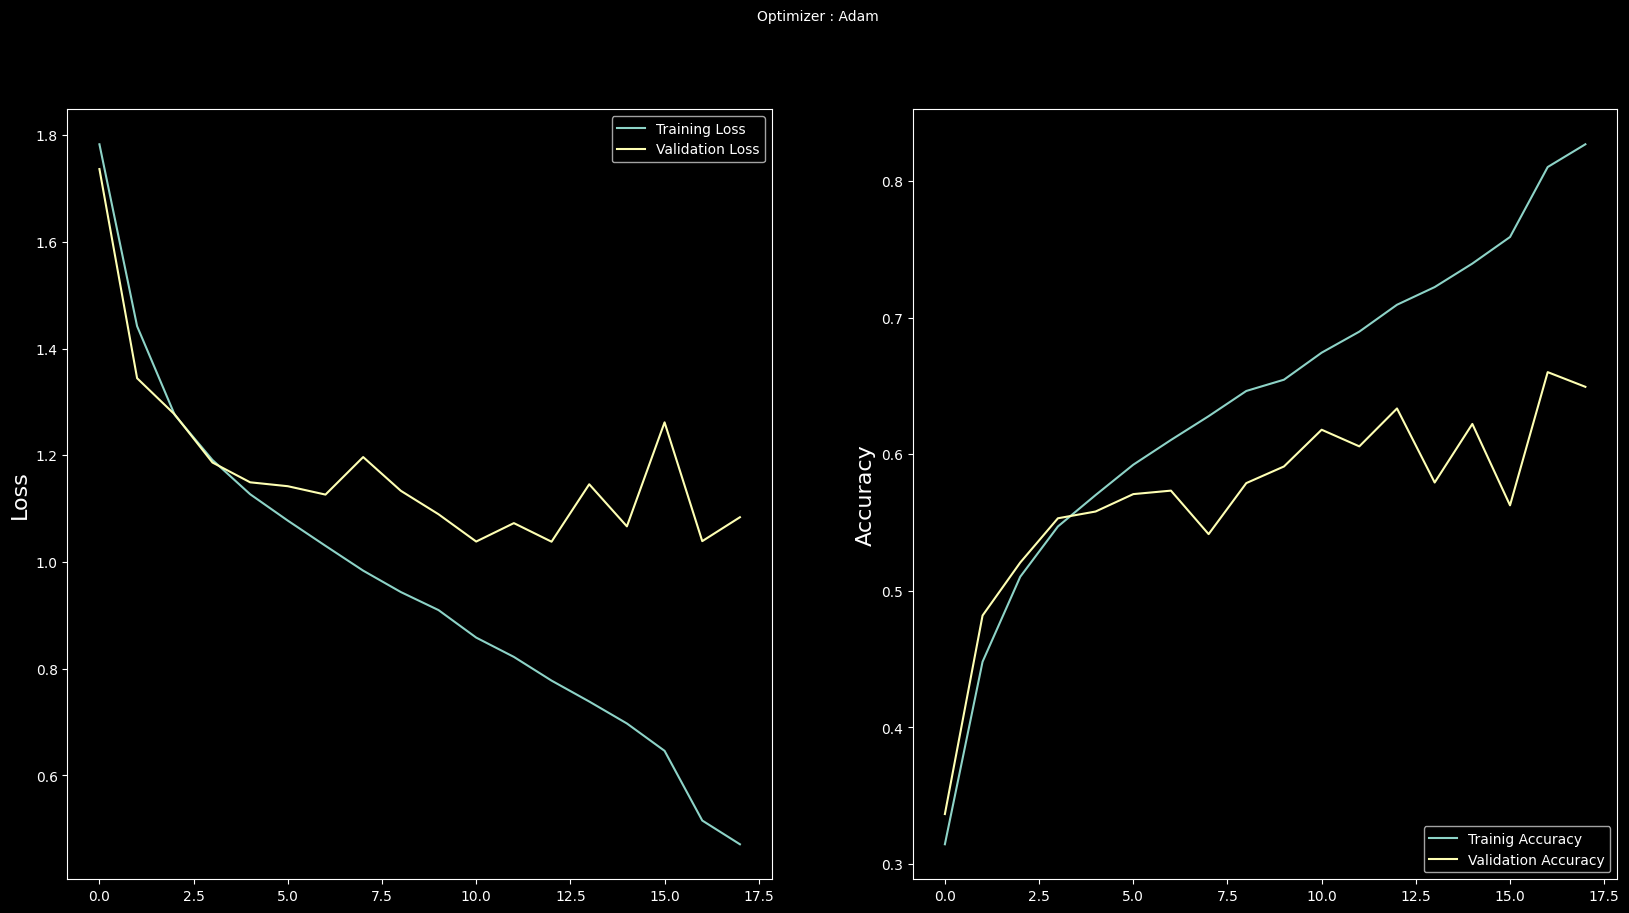

In [69]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Optimizer : Adam', fontsize = 10)
plt.ylabel('Loss',fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(history.history['accuracy'],label='Trainig Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire les classes pour l'ensemble de test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)  # Assurez-vous que y_test est encodé en one-hot

# Générer la matrice de confusion
cm = confusion_matrix(y_true, y_pred_classes)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion')
plt.ylabel('Valeurs Réelles')
plt.xlabel('Prédictions')
plt.show()


NameError: name 'model' is not defined